DATA CRAWLING

When we researched what factors influence tropical cyclone, it was found that there is some thesis stating that tropical cyclone is related to global warming. Therefore we try to scrape news articles from The New York Times to find if there is any connection between them. So The data for scraping comes from THE NEW YORK TIMES by using the search_API, with the help of dateutil which is our major package.

The articles about the tropical cyclone and global warming from 2000 to 2020 are to be scrapped. And the variables are the time which is 20 years and the keyword which is tropical cyclone and global warming. The results of the scrapc can stimulate our further research.

Scraping the headline, snippet, date, and link of every article from 2000 to 2020:

In [ ]:
from datetime import datetime 
import dateutil.relativedelta
import time
import csv
from collections import OrderedDict

In [ ]:
from search_api import articleAPI
api = articleAPI("S49SxPkHv9vcW0RyJqVyM7fCASbkThWL")

In [ ]:
def time_calculation():
    timeNow = datetime.now()
    timeNow2=timeNow.strftime("%Y-%m-%d")
    d = datetime.strptime(timeNow2, "%Y-%m-%d")
    d2 = d - dateutil.relativedelta.relativedelta(years=20)
    d3 = d2.strftime("%Y%m%d")
    return(d3)

In [ ]:
def getting_articles(a):
    allArticles = []
    allSubjects = {}
    for i in range(0,100):                   
        articles = api.search(q=a,\
            fq={"source":["The New York Times","Reuters","AP"]},\
            page=i,\
            begin_date=time_calculation(),  
            sort = "newest")

In [ ]:
def compile_articles(articles):
    compiled= []
    for i in articles["response"]["docs"]:
        time.sleep(0.5)  
        dictA = {}
        dictA["headline"]=i["headline"]["main"]
        if i["snippet"] is not None:
            dictA["snippet"] = i["snippet"]
        dictA["date"]=i["pub_date"][0:10]
        dictA["link"] = i["web_url"]
        compiled.append(dictA)
    return(compiled)

In [ ]:
def getting_articles(a):
    allArticles = []
    allSubjects = {}
    for i in range(0,100):
        articles = api.search(q=a,\
            page=i,\
            begin_date=time_calculation(),\
            sort = "newest")
        if articles["response"]["docs"] != []: 
            for j in articles["response"]["docs"]:
                time.sleep(0.5)
                for x in range(0,len(j['keywords'])):
                    if 'subject' in j['keywords'][x]['name']:
                        if j['keywords'][x]['value'] not in allSubjects.keys():
                            allSubjects[j['keywords'][x]['value']] = 1
                        else:
                            allSubjects[j['keywords'][x]['value']] = \
                            allSubjects[j['keywords'][x]['value']] + 1
            articles = compile_articles(articles)                                                               
            allArticles = allArticles + articles
        else:
            break
    row = []
    allSubjects = OrderedDict(sorted(allSubjects.items(), key=lambda d: d[1],reverse = True))     
    for i in range(len(allSubjects)):
        B= {}
        B["Subjects"] = list(allSubjects.keys())[i]
        B["times"] = allSubjects[list(allSubjects.keys())[i]]
        row.append(B)
    intoCsv(allArticles,row)  

The resulting data set is stored in CSV format:

In [ ]:
def intoCsv(a,b):
    with open("theDoc1.csv","w",encoding='utf-8') as fOut:
        csvOut = csv.DictWriter(fOut, 
        ["date","headline","snippet","link"])
        csvOut.writeheader()
        csvOut.writerows(a)
    
    with open("theStatistics1.csv","w",encoding='utf-8') as fOut:
        csvOut = csv.DictWriter(fOut,["Subjects","times"])
        csvOut.writeheader()
        csvOut.writerows(b)

In [ ]:
getting_articles('Tropical Cyclones And Global Warming')

For the difficulties, at first, we tried to scrape from the NEW YORK TIMES, but we can not get the document. And we changed to scrape data from google news, but it has an anti-crawler mechanism. So we try to use new york times API again, with the help of Chinese Software Developer Network (CSDN), we finally knew that there were some problems when I installed new york times article API. After changing it to install search API, it works. Therefore we can get the response.

DATA PROCESSING

When the data are available, it is clear that articles about "tropical cyclone and global warming" has increased in recent years.To make the data more obvious, the data is processed.

Process data:

In [ ]:
import  pandas as pd
f=pd.read_csv('C:\\Users\\User\\Downloads\\semA2020-2021\\COM3203\\theDoc1.csv')
date=list(f['date'].values)
temp=[]
pinci={}
for i in date:
    year=i[0:4]
    if year not in temp:
        temp.append(year)
        pinci.update({year:1})
    else:
        pinci[year]+=1
pincidata=pd.DataFrame({'year':list(pinci.keys()),'time':list(pinci.values())})
pincidata.to_csv("result.csv")
print(pincidata)

    year  time
0   2020    11
1   2019    15
2   2018    10
3   2017     8
4   2016     7
5   2015     3
6   2014     5
7   2013     6
8   2012     8
9   2011     7
10  2010     3
11  2009     2
12  2008     9
13  2007     5
14  2006     9
15  2005     4
16  2004     1
17  2003     1
18  2002     1
19  2001     3


Through the data set "theStatistics1", there are many words related to "tropical cyclone and global warming" in these articles. In addition to "global warming", "storms", there are many words that appear multiple times, such as "weather", "flood" and so on. This data set will be transformed into a wordcloud for our further research.

Get the wordcloud:

In [ ]:
from wordcloud import WordCloud
import pandas as pd
f2=pd.read_csv('C:\\Users\\User\\Downloads\\semA2020-2021\\COM3203\\theStatistics1.csv')
sub=list(f2['Subjects'].values)
times=list(f2['times'].values)
content=''
for i in range(0,len(sub)):
    content+=(sub[i]+'\\')*times[i]
wordcloud = WordCloud(background_color='#1F2630',
                      width=1000,
                      height=860,
                      max_words=200,
                      collocations=False).generate(content)

image_produce = wordcloud.to_image()
image_produce.show()
image_produce.save("ciyun.jpg")

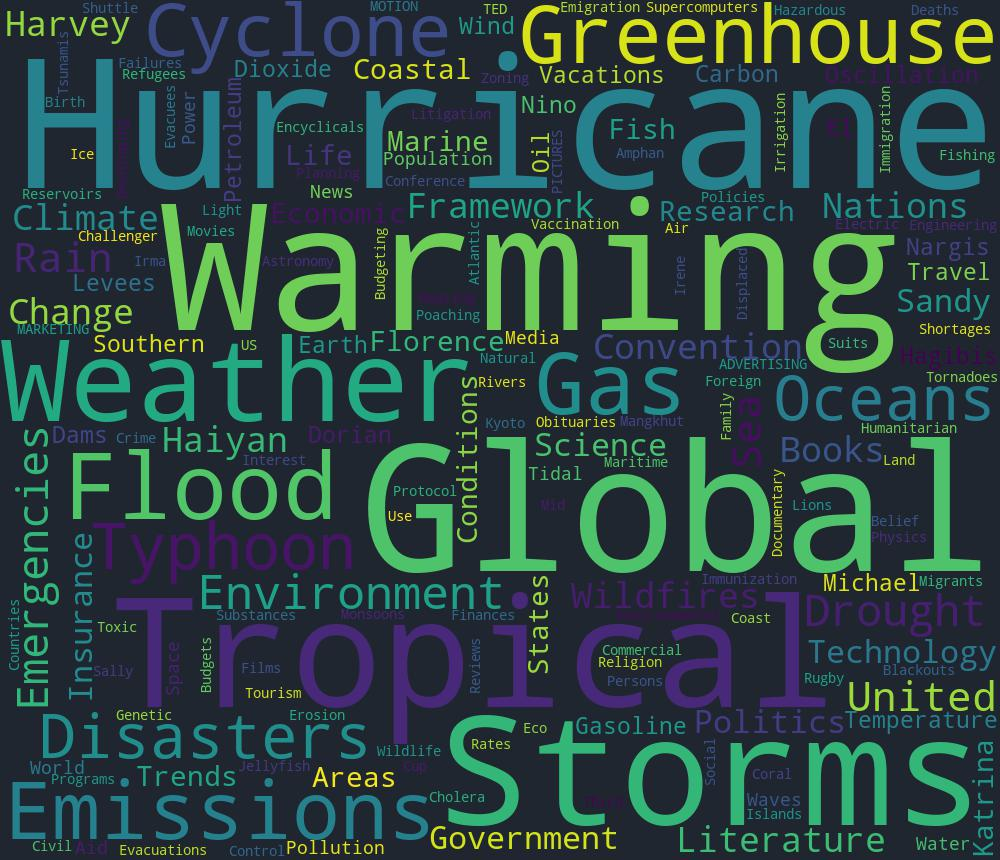

Through this wordcloud, it is obvious that tropical cyclone will appear with floods, greenhouse gas emmisions, environment and so on, which means that in addition to being linked to global warming, tropical cyclone may also be linked to floods, greenhouse gas, environment. It gives us an inspiration to do further research.

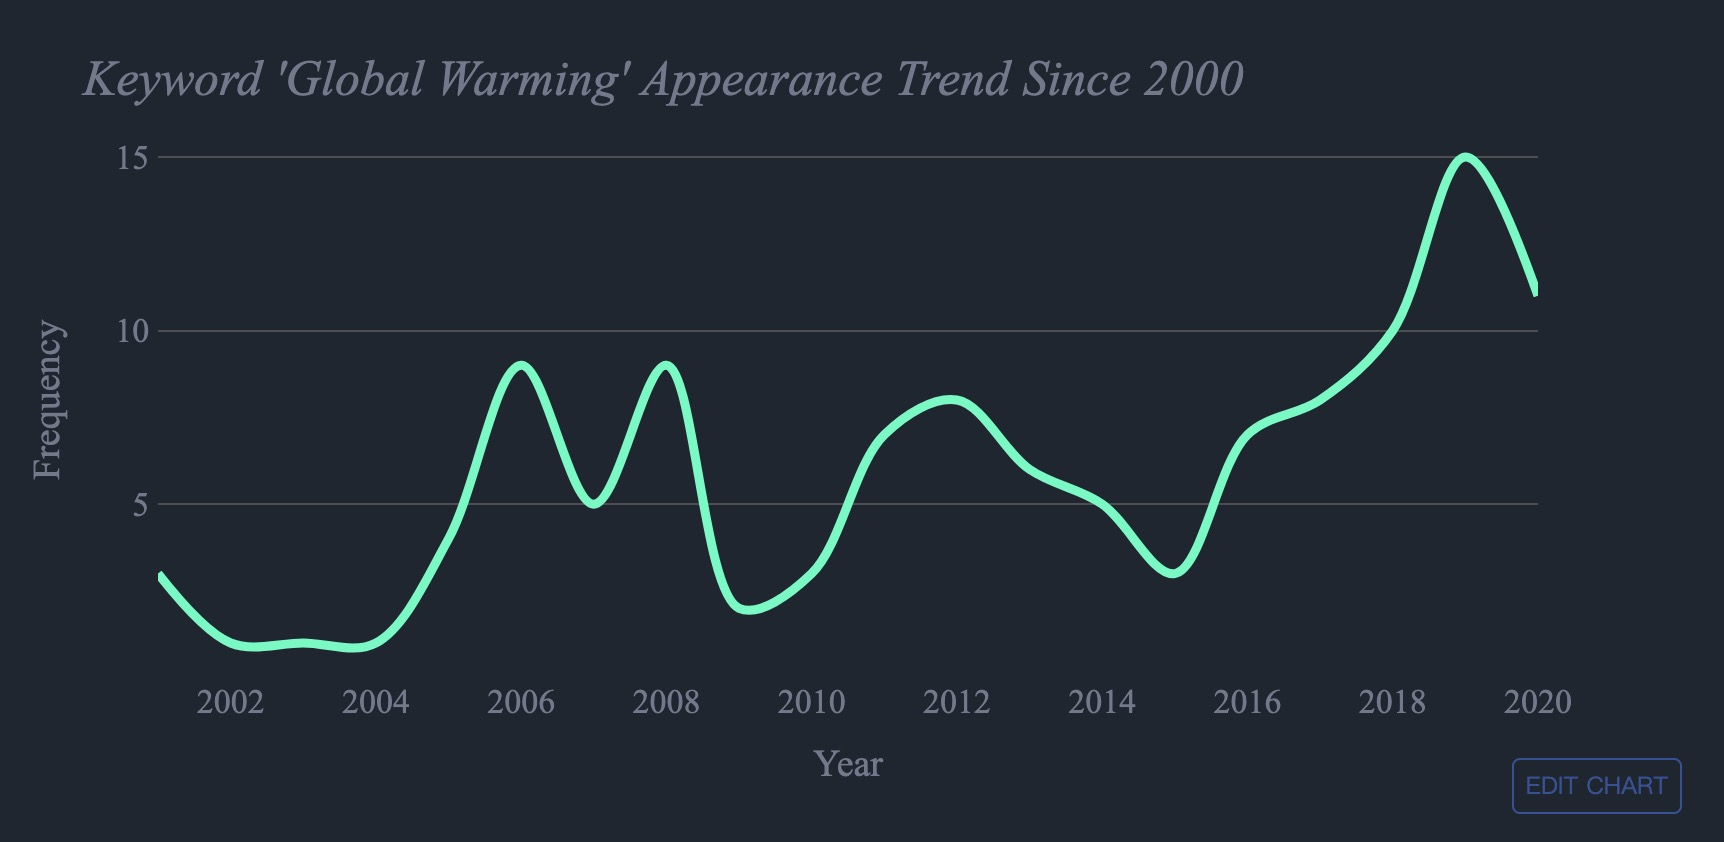

According to the New York Times data on news articles, it is clear that there has been a general increase in the number of articles appearing at the same time as "tropical cyclone" and "global warming", as shown in the chart. This suggests that tropical storms may have something to do with global warming, which hasn't been proven yet but gives us a hint for further research.